In [2]:
import pandas as pd
train=pd.read_csv("C:/Users/MYCOM/data/insurance_train.csv")
test=pd.read_csv("C:/Users/MYCOM/data/insurance_test.csv")

## 전처리

In [3]:
train.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.472227,-1.756525,0.734336,9.126398,1,0,1,0,0,1,0,0
1,0.543313,-1.033082,-0.911192,9.052009,1,0,1,0,1,0,0,0
2,0.898745,-0.943687,-0.911192,10.207990,1,0,1,0,0,0,1,0
3,-0.025379,0.622393,3.202629,9.059265,1,0,1,0,0,0,1,0
4,1.040918,-1.504893,1.557100,9.431590,1,0,1,0,0,1,0,0


In [4]:
test.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.401140,-0.891539,0.734336,9095.06825,1,0,1,0,1,0,0,0
1,-0.238638,-0.089461,-0.911192,5272.17580,1,0,1,0,0,1,0,0
2,1.751782,-0.608453,-0.911192,29330.98315,1,0,0,1,0,1,0,0
3,0.472227,-0.797177,1.557100,9301.89355,0,1,1,0,0,1,0,0
4,-1.447107,0.225079,-0.911192,33750.29180,0,1,0,1,0,1,0,0


### 평가지표 > R2 score
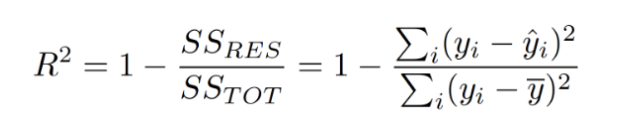

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble importt GradientBoostingRegressor
from sklearn.metrics import r2_score



gbm = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01,0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.8, 0.9, 1.0]
}
X_train = train.drop(['charges'], axis = 1,inplace=False)
y_train = train['charges']

X_test = test.drop(['charges'], axis = 1,inplace=False)
y_test = test['charges']
     

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)


print("최적 하이퍼파라미터:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred = np.expm1(y_pred)


r2 = r2_score(y_test, y_pred)
print(f'R^2 스코어: {r2}')


최적 하이퍼파라미터: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
R^2 스코어: 0.8723646482907241


In [10]:
# plot importance 확인

<AxesSubplot:title={'center':'Top Feature Importance'}>

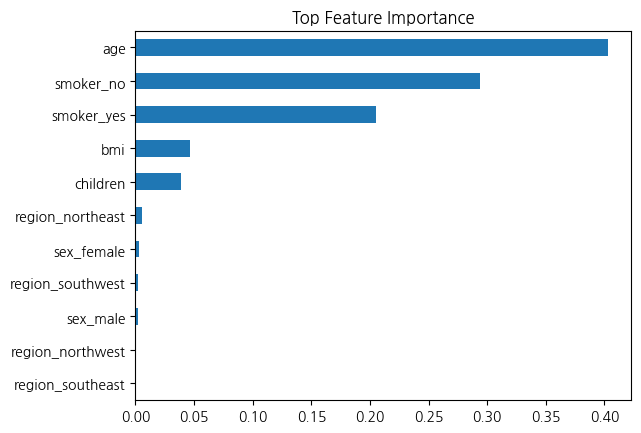

In [11]:
import matplotlib.pyplot as plt
importance=pd.Series(grid_search.best_estimator_.feature_importances_,X_train.columns)
plt.title('Top Feature Importance')
importance.sort_values().plot.barh()